#**Regression and Its Evaluation**

#Q1. What is Simple Linear Regression
It is the most basic form of regression. It is used to understand  the relationship  between one independent variable (x) and one dependent variable (y)

Formula : Y = a + bX
Y = output/dependent variable
X = independent variable
a = intercept
b = slope

Simple linear regression can be used to predict the price  from size, predicting marks of students from hours they studied etc.

#Q2. What are the key assumptions of Simple Linear Regression ?

a) The assumptions are as follows - The relationship between X and Y must be linear. This means that the value of Y changes at constant rate as X changes

b) The residuals (errors) are independent of each other

c) The errors should be normally distributed . This helps in proper statistical analysis.

(Linearity, Independence, Normality of  Errors, Equal Variance, No major outliers)


#Q3.What is heteroscedasticity, and why is it important to address in regression models ?

Heteroscedasticity means that the variance of errors is not constant across all values of the independent variables. It means that the errors change as X increases. At lower values errors are small, but at higher values errors become large.

Importance - Linear regression assumes homoscedasticity(constant variance of errors). When it is violated, your model becomes less reliable.

It also affects the predictions, as they  become less trust worthy where variance is high.

Example - As income increases, the variance of household spending increases. Low income families spend low, and high  income families spend  very differently. This shows Heteroscedasticity.

#Q4. What is Multiple Linear Regression

Multiple Linear Regression (MLR) is a statistical method to predict dependent variable (Y) using two or more independent variable (X1, X2, X3....)

Formula : Y = a + b1X1 + b2X2 + b3X3.....

Y = dependent variable
X1, X2, X3 = predictors
a = intercept
b1,b2 = effect of each independent variable.


#Q5. What is polynomial regression, and how does it differ from linear regression  ?

Polynomial Regression is a typeof regression where the relationship between the independent variable (X) and dependent variable (Y) is modeled as the nth degree polynomial.

Formula : Y=a+b1​X+b2​X2+b3​X3+…+bn​Xn

Difference with Linear Regression : Linear regression is a straight line and Polynomial regression is a curved line (parabola, s-shape)

Linear regression is simple but less flexible. Polynomial regressionis more flexible and  can fit complicated patterns.





#Q6. Impliment a Python program to fit a Simple Linear Regression model to the following sample


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X = [1,2,3,4,5]
Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Data = {
    'X': [1,2,3,4,5],
    'Y': [2.1, 4.3, 6.1, 7.9, 10.2]
}

df = pd.DataFrame(Data)
df


,X,Y
0,1,2.1
1,2,4.3
2,3,6.1
3,4,7.9
4,5,10.2


In [3]:
linear = LinearRegression()
linear.fit(df[['X']], df['Y']) #  X is is double  brackets because its independent variable


LinearRegression()

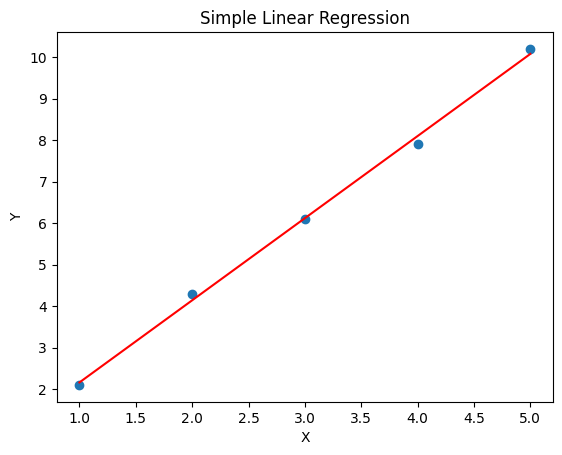

In [6]:
plt.scatter(df['X'], df['Y'])
plt.plot(df['X'], linear.predict(df[['X']]), color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.show()

#Q7. Fit a Multiple Linear Regression model on this sample data:

In [7]:
Data = {
    "Area" : [1200, 1500, 1800, 2000],
    'Rooms' :[2,3,3,4],
    'Price' : [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(Data)
df

,Area,Rooms,Price
0,1200,2,250000
1,1500,3,300000
2,1800,3,320000
3,2000,4,370000


In [8]:
line = LinearRegression()
line.fit(df[['Area', 'Rooms']], df['Price'])

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

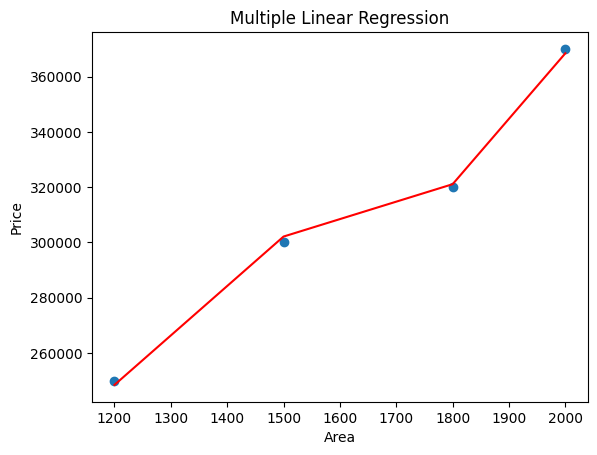

In [9]:
plt.scatter(df['Area'], df['Price'])
plt.plot(df['Area'], line.predict(df[['Area', 'Rooms']]), color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Multiple Linear Regression')
plt.show

#Q8. Implement polynomial regression on the following data:


In [10]:
data = {
    'X':  [1, 2, 3, 4, 5],
    'Y': [2.2, 4.8, 7.5, 11.2, 14.7]

}

df = pd.DataFrame(data)
df

,X,Y
0,1,2.2
1,2,4.8
2,3,7.5
3,4,11.2
4,5,14.7


In [12]:
from inspect import modulesbyfile
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

print("Coefficients", model.coef_)
print("Intercept", model.intercept_)
print('Predicted values', Y_pred)

Coefficients [0.   1.94 0.2 ]
Intercept 0.06000000000000938
Predicted values [ 2.2   4.74  7.68 11.02 14.76]


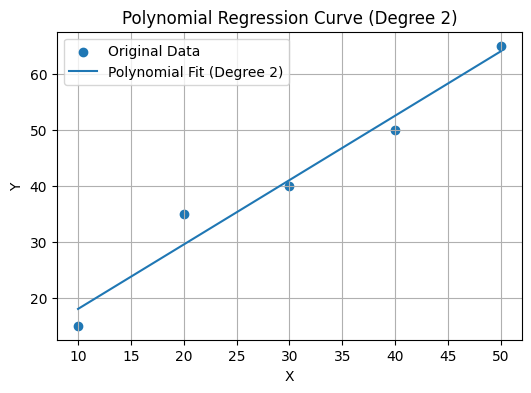

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(X, Y, label="Original Data")
plt.plot(X, Y_pred, label="Polynomial Fit (Degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression Curve (Degree 2)")
plt.legend()
plt.grid(True)
plt.show()

#Q9 .Create a residuals plot for a regression model trained on this data:

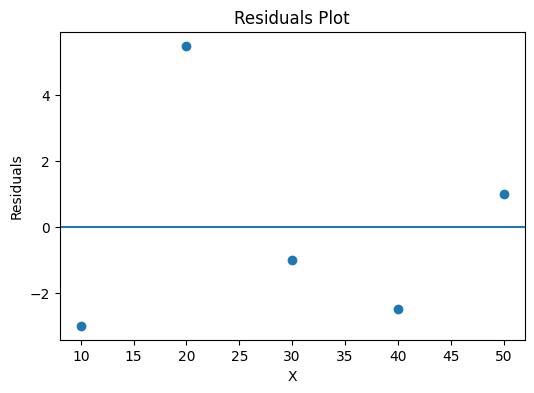

In [13]:
X = np.array([10,20,30,40,50]).reshape(-1,1)
Y = np.array([15,35,40,50,65])

model = LinearRegression()
model.fit(X,Y)

Y_pred = model.predict(X)

residuals = Y - Y_pred

plt.figure(figsize = (6,4))
plt.scatter(X, residuals)
plt.title('Residuals Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.axhline(0)

#Q10.  Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model

Taking an example -
1) Area
2) Number of rooms
3) Location score

**Heteroscedasticity**
Errors increase as house area increases
Instead of price we can calculate log of price ;  
df['Log_Price'] = np.log(df['Price'])

Give smaller weight to data points with large errors. If houses have higher variance,assign lower  weight to them.

Tree-based models (Random Forest, XGBoost) are naturally resistant to heteroscedasticity.

**Multicollinearity**

High multicollonearity --- means unstable coeff --- confusing interpretations
For  Ex = if area predicts price better than rooms , we can drop rooms.

Ridge reduces coefficient instability.
Lasso can remove unnecessary features.

**Summary**
To address heteroscedasticity = I would first check for the residual plot. If residuals / errors increase with house size, I would use log transform  or weighted least square.

To address multicollinearity, I would calculate the corr matrix. If the area and rooms are highly correlate,I would drop one and combine  features.